In [3]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
combined_data = pd.merge(trial_data, mouse_data,on='Mouse ID', how='left')

# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Mean_Tumor_Data = combined_data.groupby(['Drug', 'Timepoint']).mean()
# Convert to DataFrame
Mean_Tumor_Data.reset_index(inplace=True)
# Preview DataFrame
Mean_Tumor_Data.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
Mean_Tumor_Error_Data = combined_data.groupby(['Drug', 'Timepoint']).sem()
# Convert to DataFrame
Mean_Tumor_Error_Data.reset_index(inplace=True)
# Preview DataFrame
Mean_Tumor_Error_Data.head()

,Drug,Timepoint,Metastatic Sites,Mouse ID,Tumor Volume (mm3)
0,Capomulin,0,0.000000,NaN,0.000000
1,Capomulin,5,0.074833,NaN,0.448593
2,Capomulin,10,0.125433,NaN,0.702684
3,Capomulin,15,0.132048,NaN,0.838617
4,Capomulin,20,0.161621,NaN,0.909731


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [12]:
# Minor Data Munging to Re-Format the Data Frames
Mean_Tumor_Data_Pivot = Mean_Tumor_Data.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
Mean_Tumor_Error_Data_Pivot = Mean_Tumor_Error_Data.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
# Preview that Reformatting worked
Mean_Tumor_Data_Pivot.head()
#Mean_Tumor_Error_Data_Pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


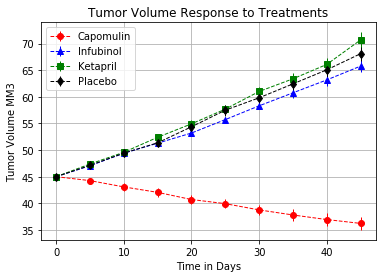

In [20]:
# Generate the Plot (with Error Bars)

plt.errorbar(Mean_Tumor_Data_Pivot.index, Mean_Tumor_Data_Pivot['Capomulin'], yerr=Mean_Tumor_Error_Data_Pivot['Capomulin'], color='r', marker='o', linestyle='dashed', linewidth=1.0)
plt.errorbar(Mean_Tumor_Data_Pivot.index, Mean_Tumor_Data_Pivot['Infubinol'], yerr=Mean_Tumor_Error_Data_Pivot['Infubinol'], color='b', marker='^', linestyle='dashed', linewidth=1.0)
plt.errorbar(Mean_Tumor_Data_Pivot.index, Mean_Tumor_Data_Pivot['Ketapril'], yerr=Mean_Tumor_Error_Data_Pivot['Ketapril'], color='g', marker='s', linestyle='dashed', linewidth=1.0)
plt.errorbar(Mean_Tumor_Data_Pivot.index, Mean_Tumor_Data_Pivot['Placebo'], yerr=Mean_Tumor_Error_Data_Pivot['Placebo'], color='k', marker='d', linestyle='dashed', linewidth=1.0)

plt.title('Tumor Volume Response to Treatments')
plt.ylabel('Tumor Volume MM3')
plt.xlabel('Time in Days')
plt.grid(True)
plt.legend(loc='best')

# Save the Figure
plt.savefig('Response_Plot.png')
plt.show()

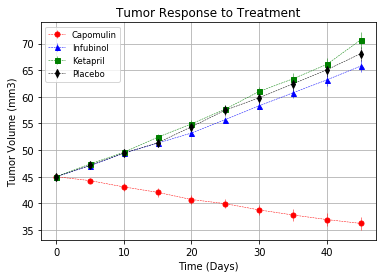

In [5]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [15]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Metastatic_Mean = Mean_Tumor_Data.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

# Preview DataFrame
Metastatic_Mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [16]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
Metastatic_Mean_Error = Mean_Tumor_Error_Data.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

# Preview DataFrame
Metastatic_Mean_Error.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


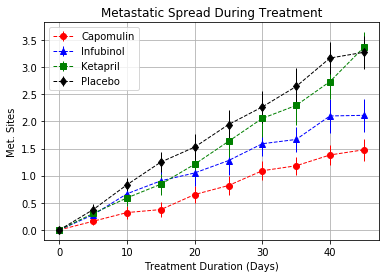

In [18]:
# Generate the Plot (with Error Bars)

plt.errorbar(Metastatic_Mean.index, Metastatic_Mean['Capomulin'], yerr=Metastatic_Mean_Error['Capomulin'], color='r', marker='o', linestyle='dashed', linewidth=1.0)
plt.errorbar(Metastatic_Mean.index, Metastatic_Mean['Infubinol'], yerr=Metastatic_Mean_Error['Infubinol'], color='b', marker='^', linestyle='dashed', linewidth=1.0)
plt.errorbar(Metastatic_Mean.index, Metastatic_Mean['Ketapril'], yerr=Metastatic_Mean_Error['Ketapril'], color='g', marker='s', linestyle='dashed', linewidth=1.0)
plt.errorbar(Metastatic_Mean.index, Metastatic_Mean['Placebo'], yerr=Metastatic_Mean_Error['Placebo'], color='k', marker='d', linestyle='dashed', linewidth=1.0)

plt.title('Metastatic Spread During Treatment')
plt.ylabel('Met. Sites')
plt.xlabel('Treatment Duration (Days)')
plt.grid(True)
plt.legend(loc='best')

# Save the Figure
plt.savefig('Response_Plot.png')

# Show the Figure
plt.show()

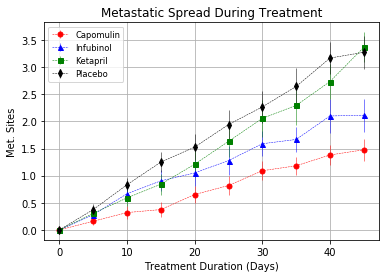

## Survival Rates

In [23]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Mice_Count = combined_data.groupby(['Drug', 'Timepoint']).count()
Mice_Count.reset_index(inplace=True)
Mice_Count.drop(['Mouse ID', 'Tumor Volume (mm3)'], axis=1, inplace=True)
Mice_Count.rename(columns={'Metastatic Sites': 'Mouse Count'}, inplace=True)

# Preview DataFrame
Mice_Count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [24]:
# Minor Data Munging to Re-Format the Data Frames
Mice_Count_Pivot = Mice_Count.pivot(values='Mouse Count', index='Timepoint', columns='Drug')
# Preview the Data Frame
Mice_Count_Pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


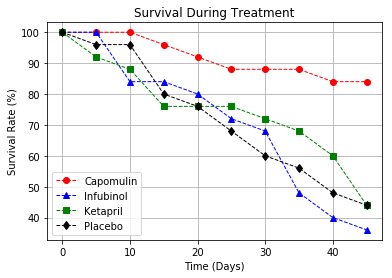

In [26]:
# Generate the Plot (Accounting for percentages)
plt.plot(Mice_Count_Pivot.index, 100*Mice_Count_Pivot['Capomulin']/25, color='r', marker='o', linestyle='dashed', linewidth=1.0)
plt.plot(Mice_Count_Pivot.index, 100*Mice_Count_Pivot['Infubinol']/25, color='b', marker='^', linestyle='dashed', linewidth=1.0)
plt.plot(Mice_Count_Pivot.index, 100*Mice_Count_Pivot['Ketapril']/25, color='g', marker='s', linestyle='dashed', linewidth=1.0)
plt.plot(Mice_Count_Pivot.index, 100*Mice_Count_Pivot['Placebo']/25, color='k', marker='d', linestyle='dashed', linewidth=1.0)

plt.title('Survival During Treatment')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Time (Days)')
plt.grid(True)
plt.legend(loc='best')
plt.savefig('survival.png')
plt.show()

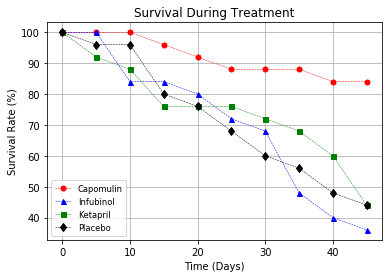

## Summary Bar Graph

In [28]:
# Calculate the percent changes for each drug
summary_data = combined_data[["Drug", "Timepoint", "Tumor Volume (mm3)"]]
summary_mean = summary_data.groupby(['Drug', 'Timepoint']).mean()
summary_mean.reset_index(inplace=True)
summary_mean = summary_mean.pivot(values='Tumor Volume (mm3)', index='Timepoint', columns='Drug')
summary_mean = summary_mean[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]

summary_change = (summary_mean.loc[45, :] - summary_mean.loc[0, :])/summary_mean.loc[0, :] * 100

# Display the data to confirm
summary_change

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

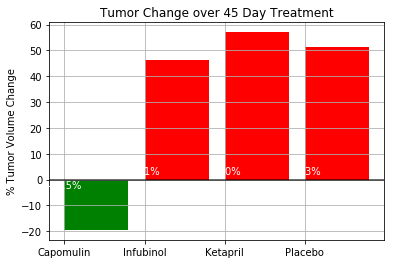

In [50]:
# Store all Relevant Percent Changes into a Tuple
Tuple = summary_change.index

plt.title('Tumor Change over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')
plt.axhline(y=0, color='black', alpha = .75)
plt.xticks(np.arange(len(Tuple)), Tuple)
plt.grid(True)

# Splice the data between passing and failing drugs
plt.bar(np.arange(4),
       summary_change,
       color = ['r' if summary_change[r] > 0 else 'g' for r in np.arange(len(Tuple))],
       align = 'edge' )

count = 0 

# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
for i in summary_change:
    if i < 0:
        y_coor = -3.5
    else:
        y_coor = 2
    plt.text(count, y_coor, str(round(i, 1)) + '%', ha = 'center', color='w')
    count += 1
    
# Save the Figure
plt.savefig('summary.png')

# Show the Figure
plt.show()

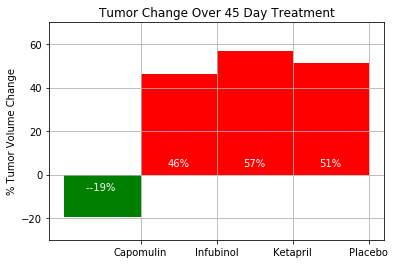